In [38]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

from sklearn.cluster import KMeans, k_means

%matplotlib inline

In [39]:
#################################################################################################################
##############################   Getting the file from SQL Server      ##########################################
#################################################################################################################

import pyodbc as podbc

conn2 = podbc.connect("Driver={SQL Server Native Client 11.0};"
                     "Server=DESKTOP-S8TORHP;"
                     "Database=dataset1;"
                     "Trusted_Connection=yes;")

# rynning the SQL quey i need
SQL_Query = pd.read_sql_query('''SELECT Fructose, Glucose, Maltose, Turanose, "Mélibiose+ Isomaltose", Saccharose, Tréhalose, Gentibiose,Palatinose, Raffinose, Erlose, Mélézitose, Maltotriose, Panose, Isomaltotriose FROM [dataset1].[dbo].[Sheet01]''', conn2)

#conn.close()



# Viz
SQL_Query.head()

C:\Users\abbel\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,Fructose,Glucose,Maltose,Turanose,Mélibiose+ Isomaltose,Saccharose,Tréhalose,Gentibiose,Palatinose,Raffinose,Erlose,Mélézitose,Maltotriose,Panose,Isomaltotriose
0,38.45,33.48,5.09,1.63,0.29,0.43,0.0,0.00,0.0,0.0,1.72,0.03,0.10,0.0,0.0
1,40.30,31.95,4.49,1.43,0.32,0.18,0.0,0.00,0.0,0.0,0.53,0.04,0.05,0.0,0.0
2,38.80,34.46,4.00,1.42,0.28,0.20,0.0,0.00,0.0,0.0,1.32,0.04,0.38,0.0,0.0
3,37.89,32.56,5.34,1.74,0.56,0.50,0.0,0.14,0.0,0.0,1.71,0.06,0.15,0.0,0.0
4,37.16,33.91,5.12,1.65,0.45,0.45,0.0,0.00,0.0,0.0,1.36,0.06,0.13,0.0,0.0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Mélézitose', ylabel='Maltotriose'>

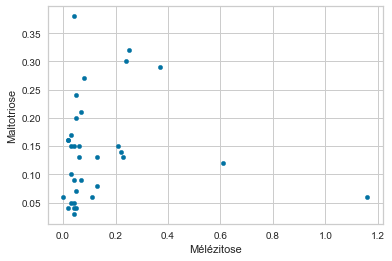

In [40]:
# affichage nuage de points entre les 2 dernieres variables
SQL_Query.plot(x="Mélézitose",y="Maltotriose",kind="scatter")

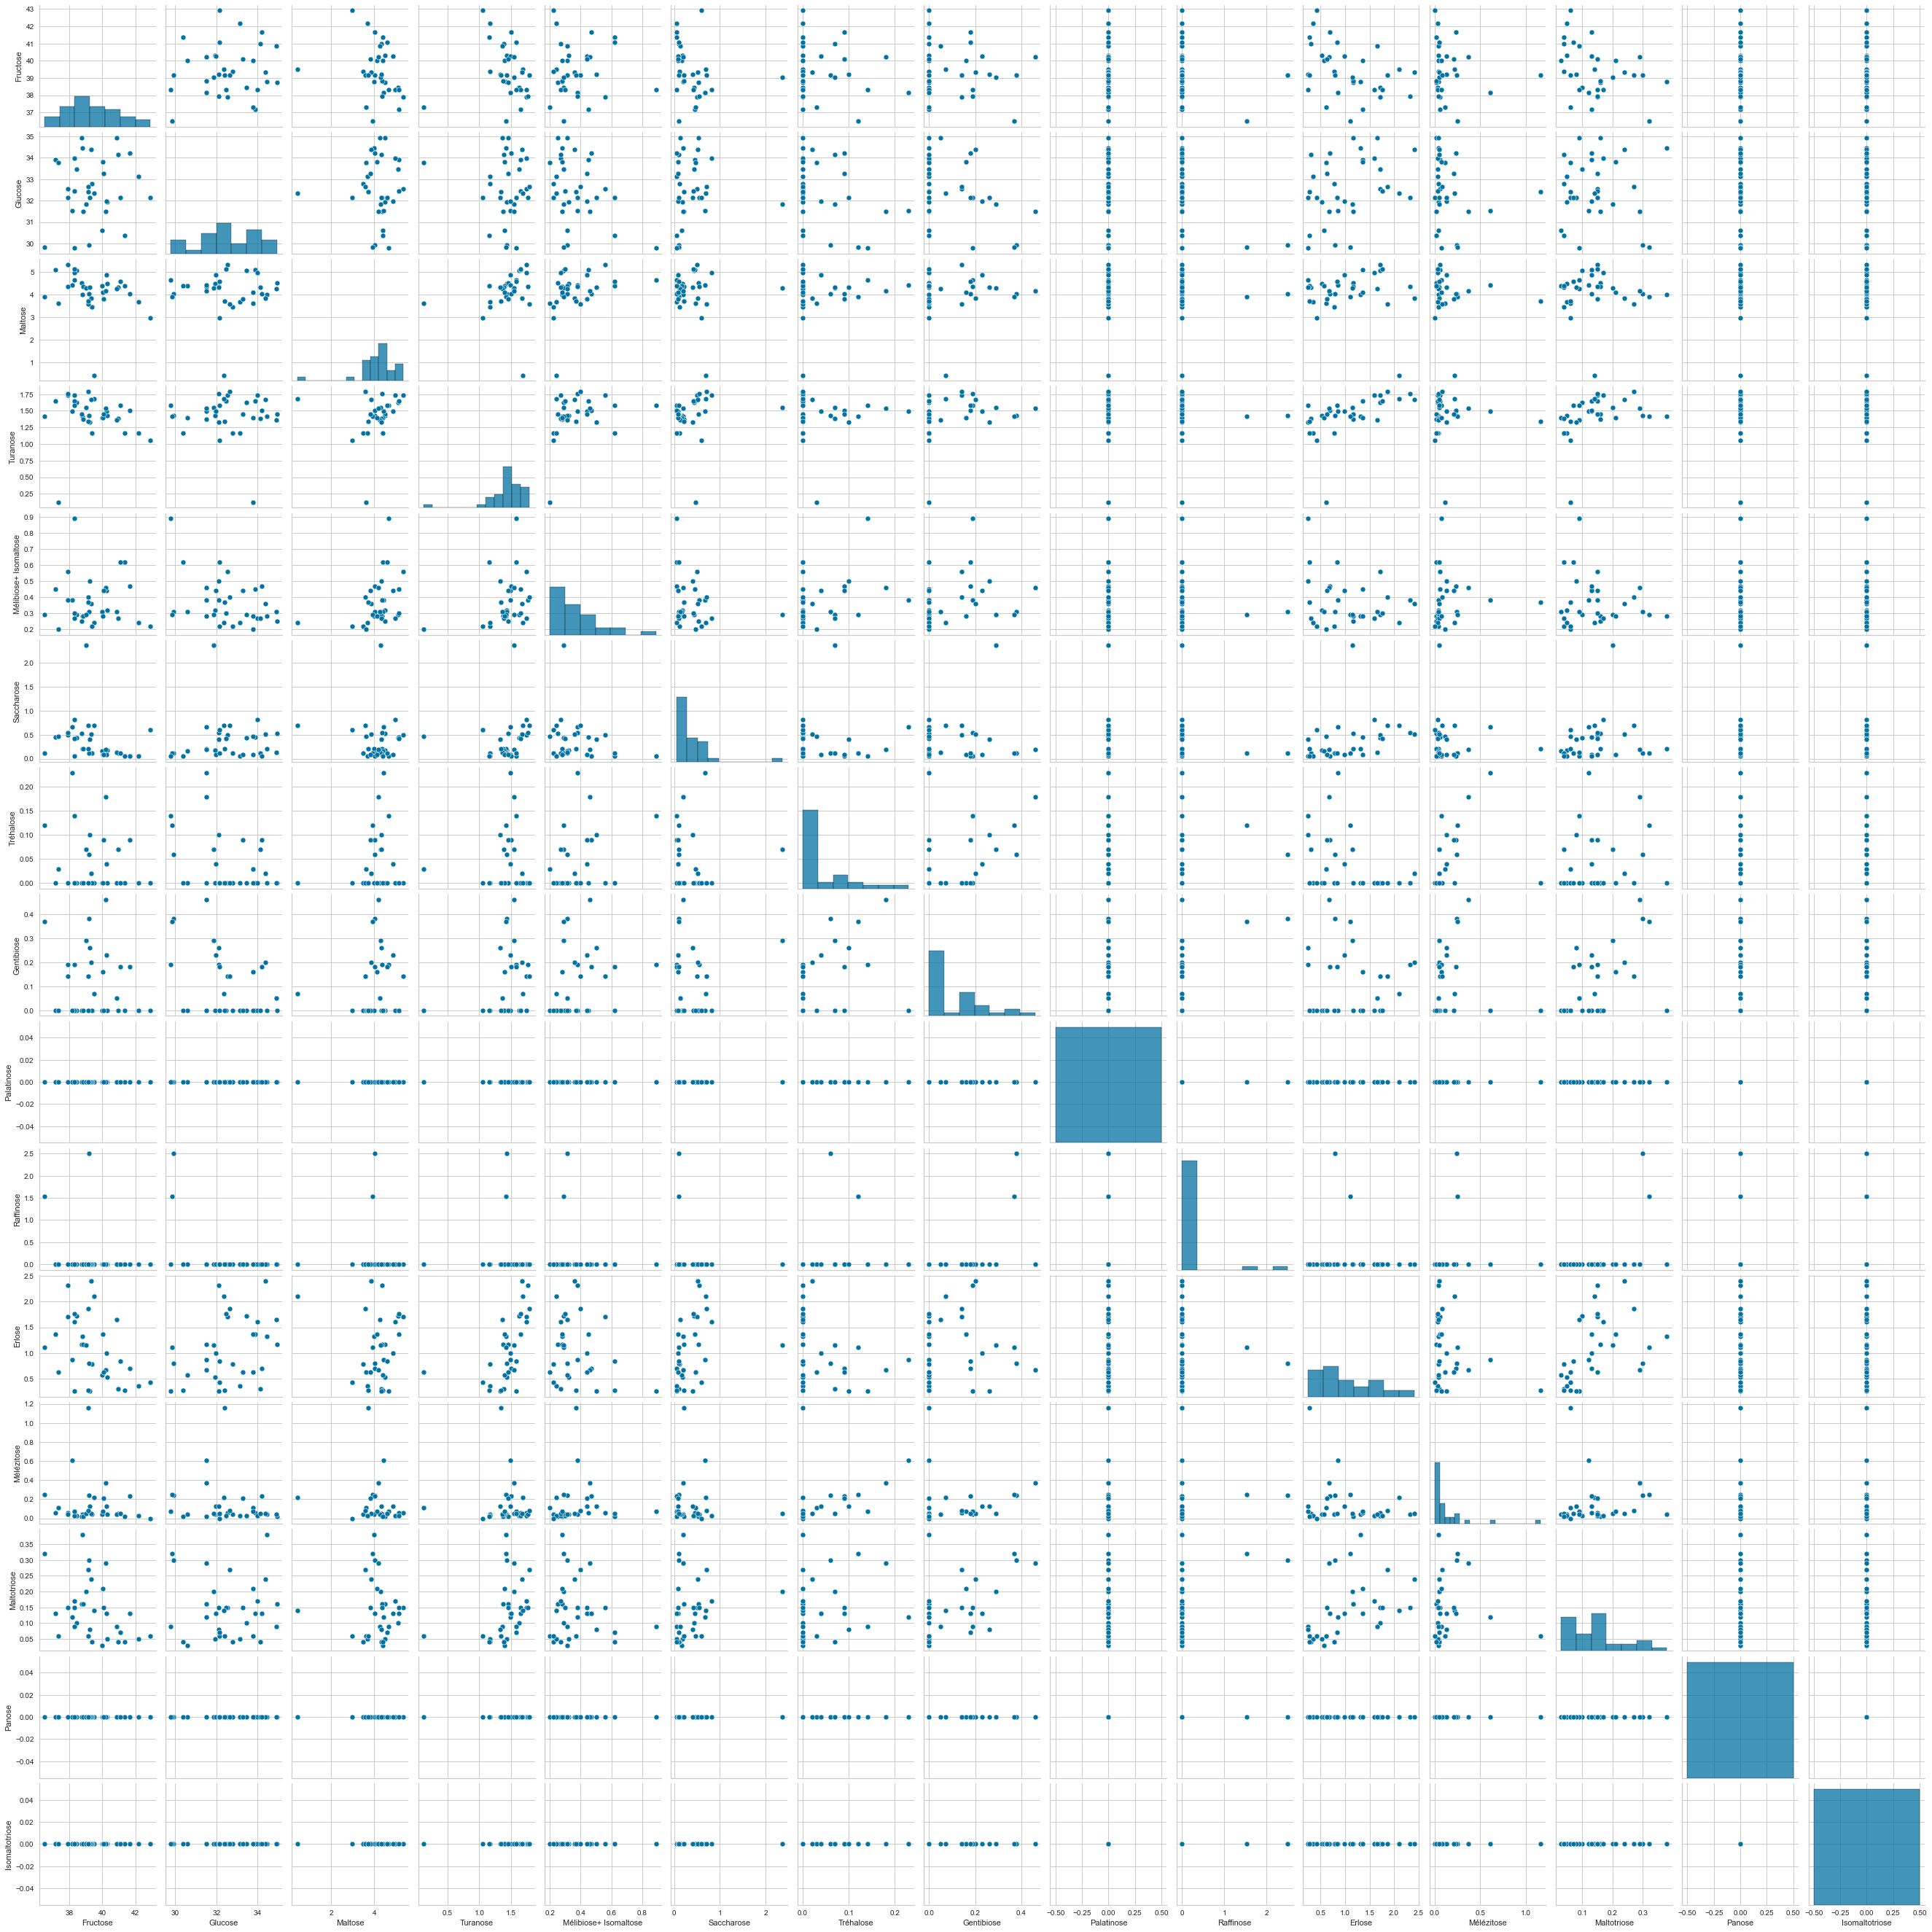

In [41]:
# nuage par paire
import seaborn as sns
sns.pairplot(SQL_Query)

In [42]:
# moyennes par variable   // calcule par collone (variable) axis=0, calcule par ligne axis=1
SQL_Query.mean(axis=0)

Fructose                 39.428235
Glucose                  32.560294
Maltose                   4.158235
Turanose                  1.438059
Mélibiose+ Isomaltose     0.367941
Saccharose                0.364412
Tréhalose                 0.036471
Gentibiose                0.102647
Palatinose                0.000000
Raffinose                 0.118529
Erlose                    1.054412
Mélézitose                0.135882
Maltotriose               0.141471
Panose                    0.000000
Isomaltotriose            0.000000
dtype: float64

In [43]:
# écarts-type par variable
SQL_Query.std(axis=0)

Fructose                 1.452604
Glucose                  1.439422
Maltose                  0.844535
Turanose                 0.294342
Mélibiose+ Isomaltose    0.144343
Saccharose               0.421514
Tréhalose                0.059436
Gentibiose               0.133537
Palatinose               0.000000
Raffinose                0.495838
Erlose                   0.624700
Mélézitose               0.219229
Maltotriose              0.090257
Panose                   0.000000
Isomaltotriose           0.000000
dtype: float64

In [44]:
# standardisation (centré reduit)
Z = (SQL_Query - SQL_Query.mean(axis=0))/SQL_Query.std(axis=0)
print(Z)

    Fructose   Glucose   Maltose  Turanose  Mélibiose+ Isomaltose  Saccharose  \
0  -0.673436  0.638941  1.103287  0.652103              -0.539970    0.155602   
1   0.600139 -0.423985  0.392837 -0.027379              -0.332133   -0.437499   
2  -0.432489  1.319770 -0.187364 -0.061353              -0.609250   -0.390051   
3  -1.058950 -0.000204  1.399308  1.025818               1.330568    0.321670   
4  -1.561496  0.937672  1.138810  0.720051               0.568497    0.203050   
5  -0.466910  1.660184  0.416519  0.040569              -0.817087    0.392842   
6  -0.411837 -0.736611  0.238906 -0.231224              -0.609250   -0.366327   
7  -0.762930  0.993250  0.973038  1.025818              -0.678529    1.080838   
8  -0.769814 -0.069677  1.162492  0.720051              -0.470691    0.131878   
9   0.049404 -0.146096 -4.414543  0.821973              -0.886366    0.772426   
10 -0.873077 -0.722716  0.333633  0.176465               0.083543    0.724978   
11  0.393614 -1.361862  0.29

In [45]:
# vérification - moyennes
Z.mean(axis=0)

Fructose                -7.640947e-16
Glucose                 -1.391044e-15
Maltose                 -9.502203e-16
Turanose                 4.718448e-16
Mélibiose+ Isomaltose    1.110223e-16
Saccharose              -3.298015e-16
Tréhalose               -3.918434e-17
Gentibiose              -4.571507e-17
Palatinose                        NaN
Raffinose               -6.040919e-17
Erlose                  -6.645011e-16
Mélézitose               3.591898e-17
Maltotriose              2.089832e-16
Panose                            NaN
Isomaltotriose                    NaN
dtype: float64

In [46]:
# vérification - écarts-type
Z.std(axis=0)

Fructose                 1.0
Glucose                  1.0
Maltose                  1.0
Turanose                 1.0
Mélibiose+ Isomaltose    1.0
Saccharose               1.0
Tréhalose                1.0
Gentibiose               1.0
Palatinose               NaN
Raffinose                1.0
Erlose                   1.0
Mélézitose               1.0
Maltotriose              1.0
Panose                   NaN
Isomaltotriose           NaN
dtype: float64

In [47]:
Z.replace([np.inf, -np.inf], np.nan, inplace=True)


In [48]:
#supprimer les données nan
Z.fillna(0, inplace=True)


In [49]:
print(Z)

    Fructose   Glucose   Maltose  Turanose  Mélibiose+ Isomaltose  Saccharose  \
0  -0.673436  0.638941  1.103287  0.652103              -0.539970    0.155602   
1   0.600139 -0.423985  0.392837 -0.027379              -0.332133   -0.437499   
2  -0.432489  1.319770 -0.187364 -0.061353              -0.609250   -0.390051   
3  -1.058950 -0.000204  1.399308  1.025818               1.330568    0.321670   
4  -1.561496  0.937672  1.138810  0.720051               0.568497    0.203050   
5  -0.466910  1.660184  0.416519  0.040569              -0.817087    0.392842   
6  -0.411837 -0.736611  0.238906 -0.231224              -0.609250   -0.366327   
7  -0.762930  0.993250  0.973038  1.025818              -0.678529    1.080838   
8  -0.769814 -0.069677  1.162492  0.720051              -0.470691    0.131878   
9   0.049404 -0.146096 -4.414543  0.821973              -0.886366    0.772426   
10 -0.873077 -0.722716  0.333633  0.176465               0.083543    0.724978   
11  0.393614 -1.361862  0.29

In [50]:
# k-means avec 2 groupes
from sklearn import cluster
res = cluster.KMeans(n_clusters=2)
res.fit(Z)

KMeans(n_clusters=2)

In [51]:
# num de cluster affectés aux groues
res.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [52]:
# affectés aux groupes
import numpy
numpy.unique(res.labels_,return_counts=True)

(array([0, 1]), array([ 5, 29], dtype=int64))

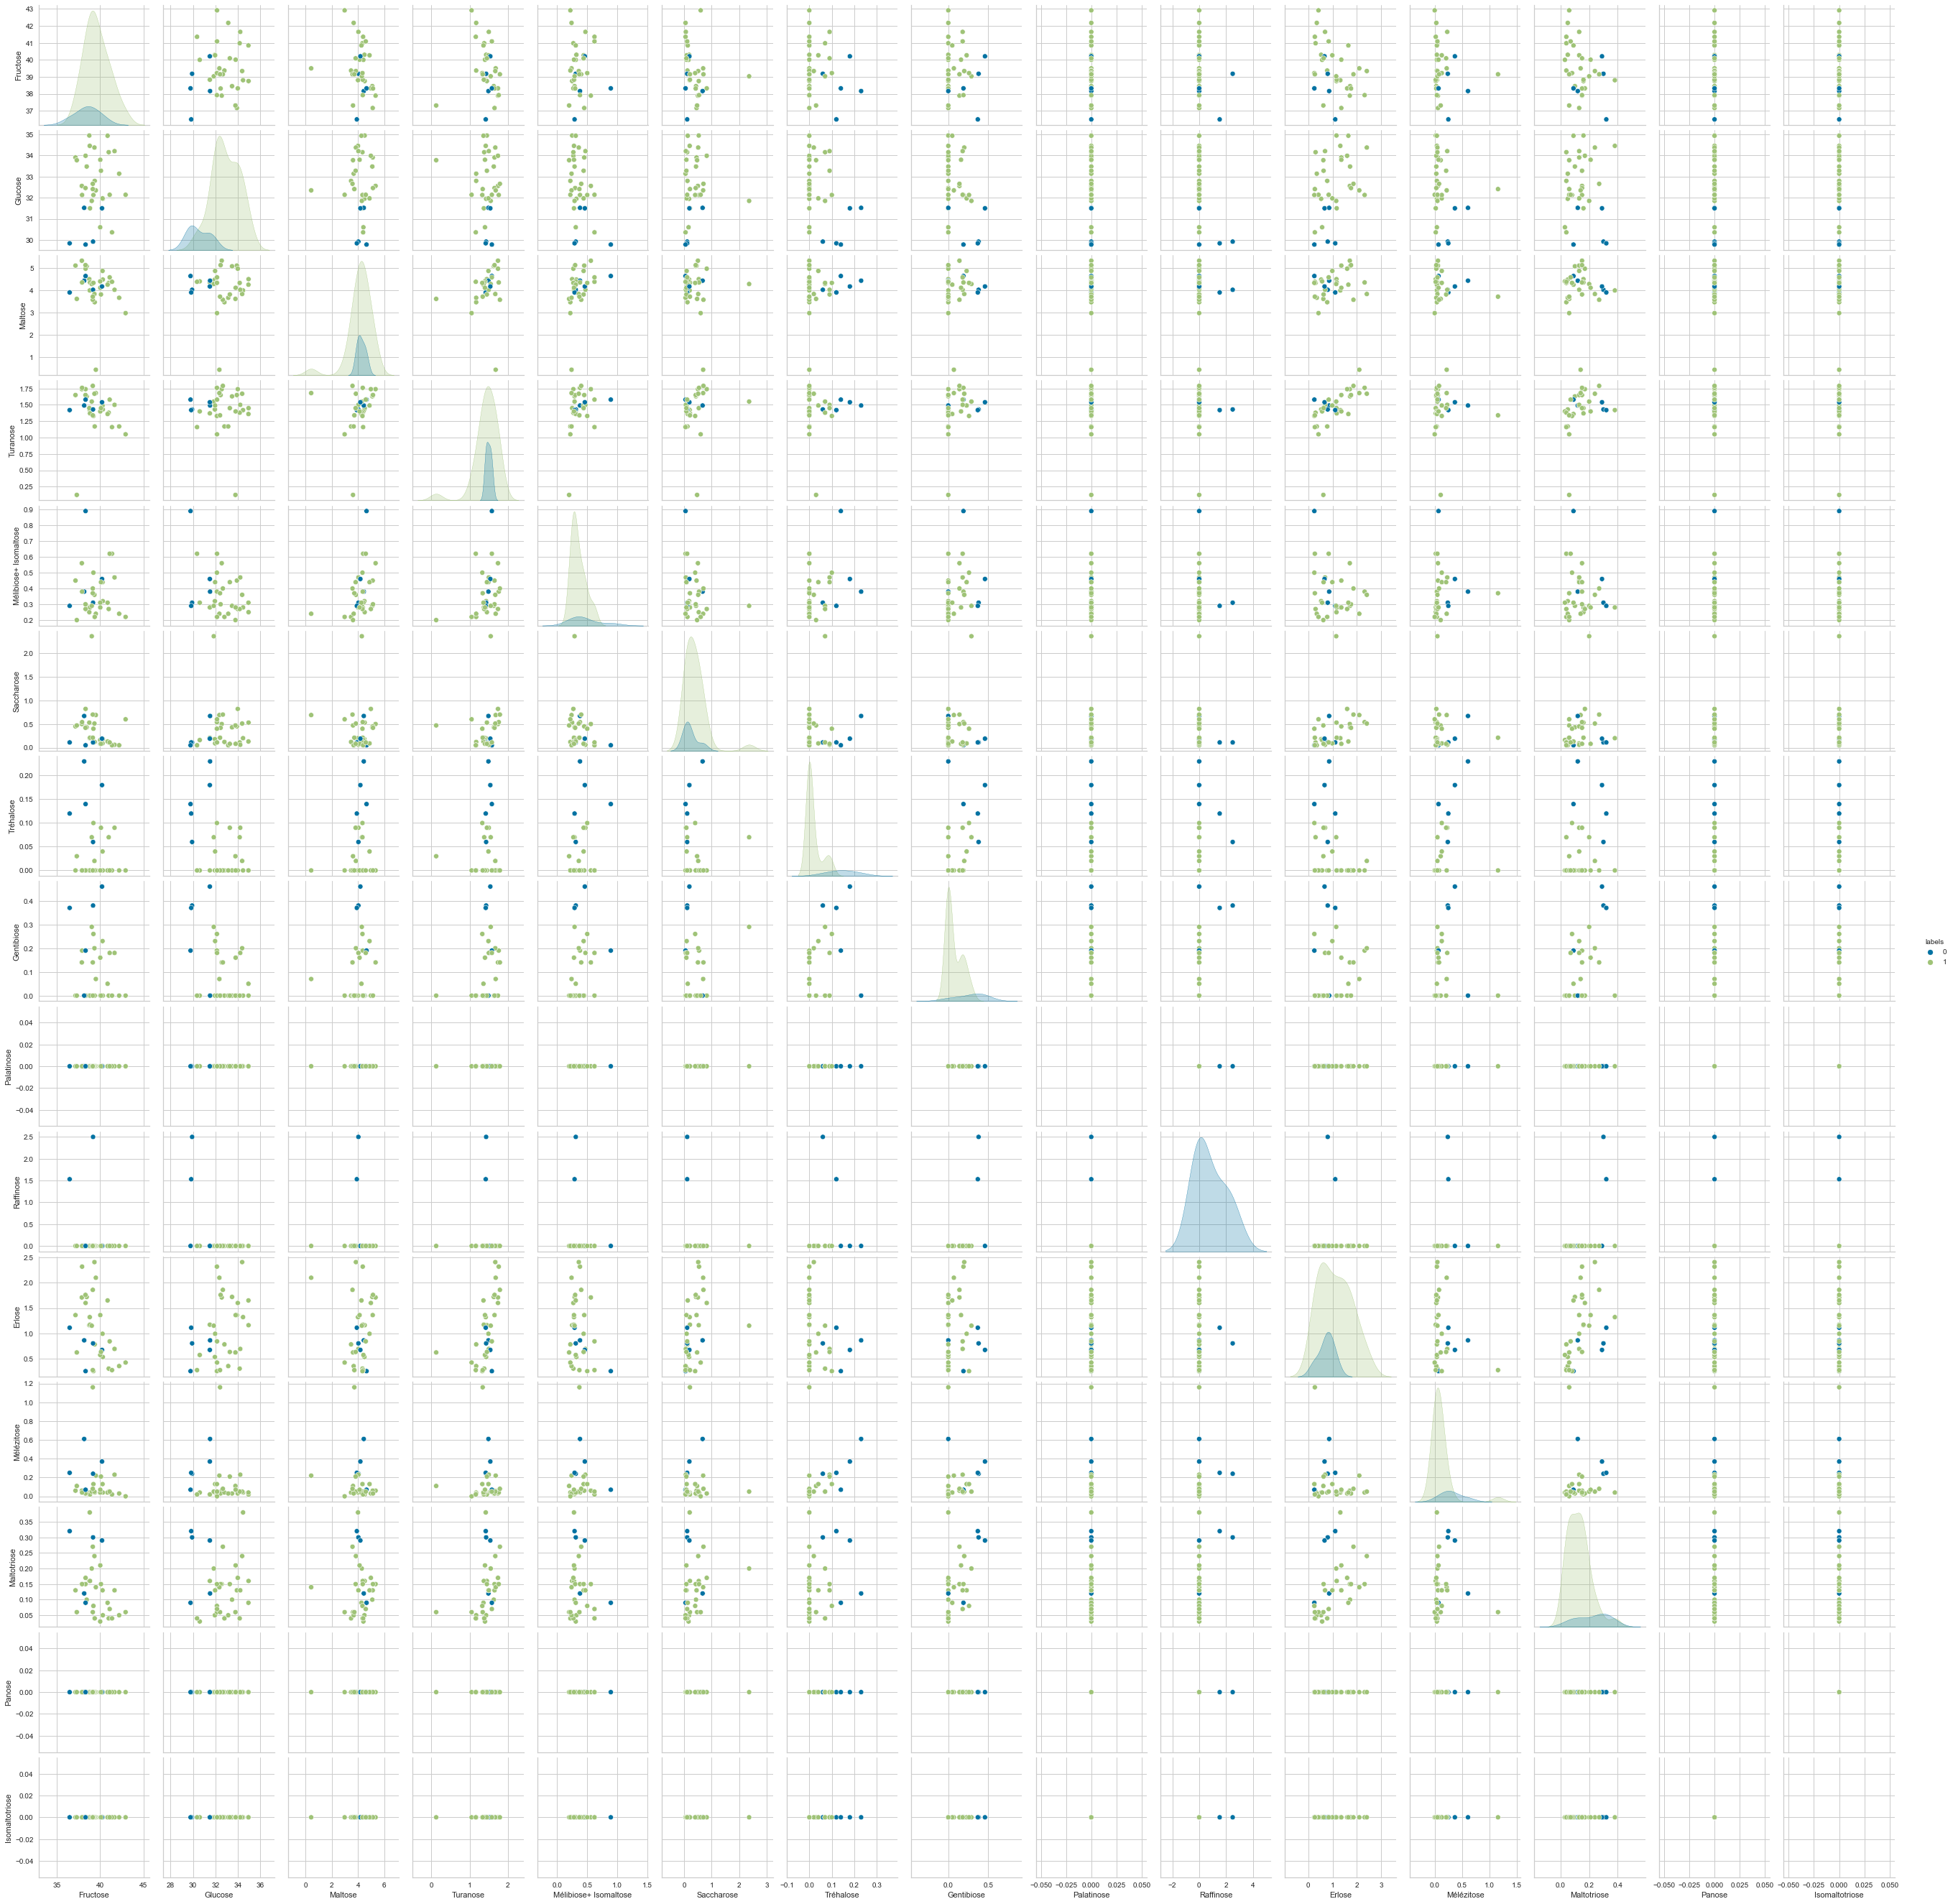

In [53]:
# rajouter la variable au dataframe initial
B = SQL_Query.copy()
B['labels'] = res.labels_

#configuration des points dans le plan
#des variables prise par paires
sns.pairplot(B,hue="labels")

sur la diagonale on à les fonctions de densités conditionnels : ca permet de savoir si quand les variables sont prise de maniere individuelles lesquelles ont le plus d'impact sur la séparabilité des clusters.

In [54]:
#moyennes par groupe
gb = SQL_Query.groupby(res.labels_)

In [55]:
#effectifs par classe
gb.size()

0     5
1    29
dtype: int64

In [56]:
# moyennes par classe
gb.mean()

,Fructose,Glucose,Maltose,Turanose,Mélibiose+ Isomaltose,Saccharose,Tréhalose,Gentibiose,Palatinose,Raffinose,Erlose,Mélézitose,Maltotriose,Panose,Isomaltotriose
0,38.472000,30.512000,4.242000,1.492000,0.466000,0.226000,0.146000,0.280000,0.0,0.806,0.738000,0.308000,0.224000,0.0,0.0
1,39.593103,32.913448,4.143793,1.428759,0.351034,0.388276,0.017586,0.072069,0.0,0.000,1.108966,0.106207,0.127241,0.0,0.0


In [74]:
#identification du nombre de groupes -- 1 à 10
from yellowbrick.cluster import KElbowVisualizer
coude = KElbowVisualizer(res,k=(1,10),metric='distortion',timings=False)

C:\Users\abbel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


AttributeError: 'KMeans' object has no attribute 'k'

AttributeError: 'KMeans' object has no attribute 'k'

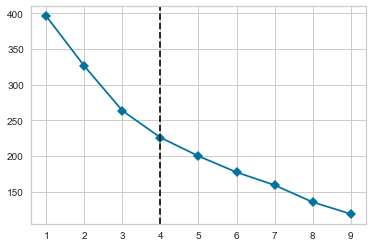

In [75]:
#calculs
coude.fit(Z)

In [76]:
# clustering en 3 custers
from sklearn import cluster
resBis = cluster.KMeans(n_clusters=4)
resBis.fit(Z)

KMeans(n_clusters=4)

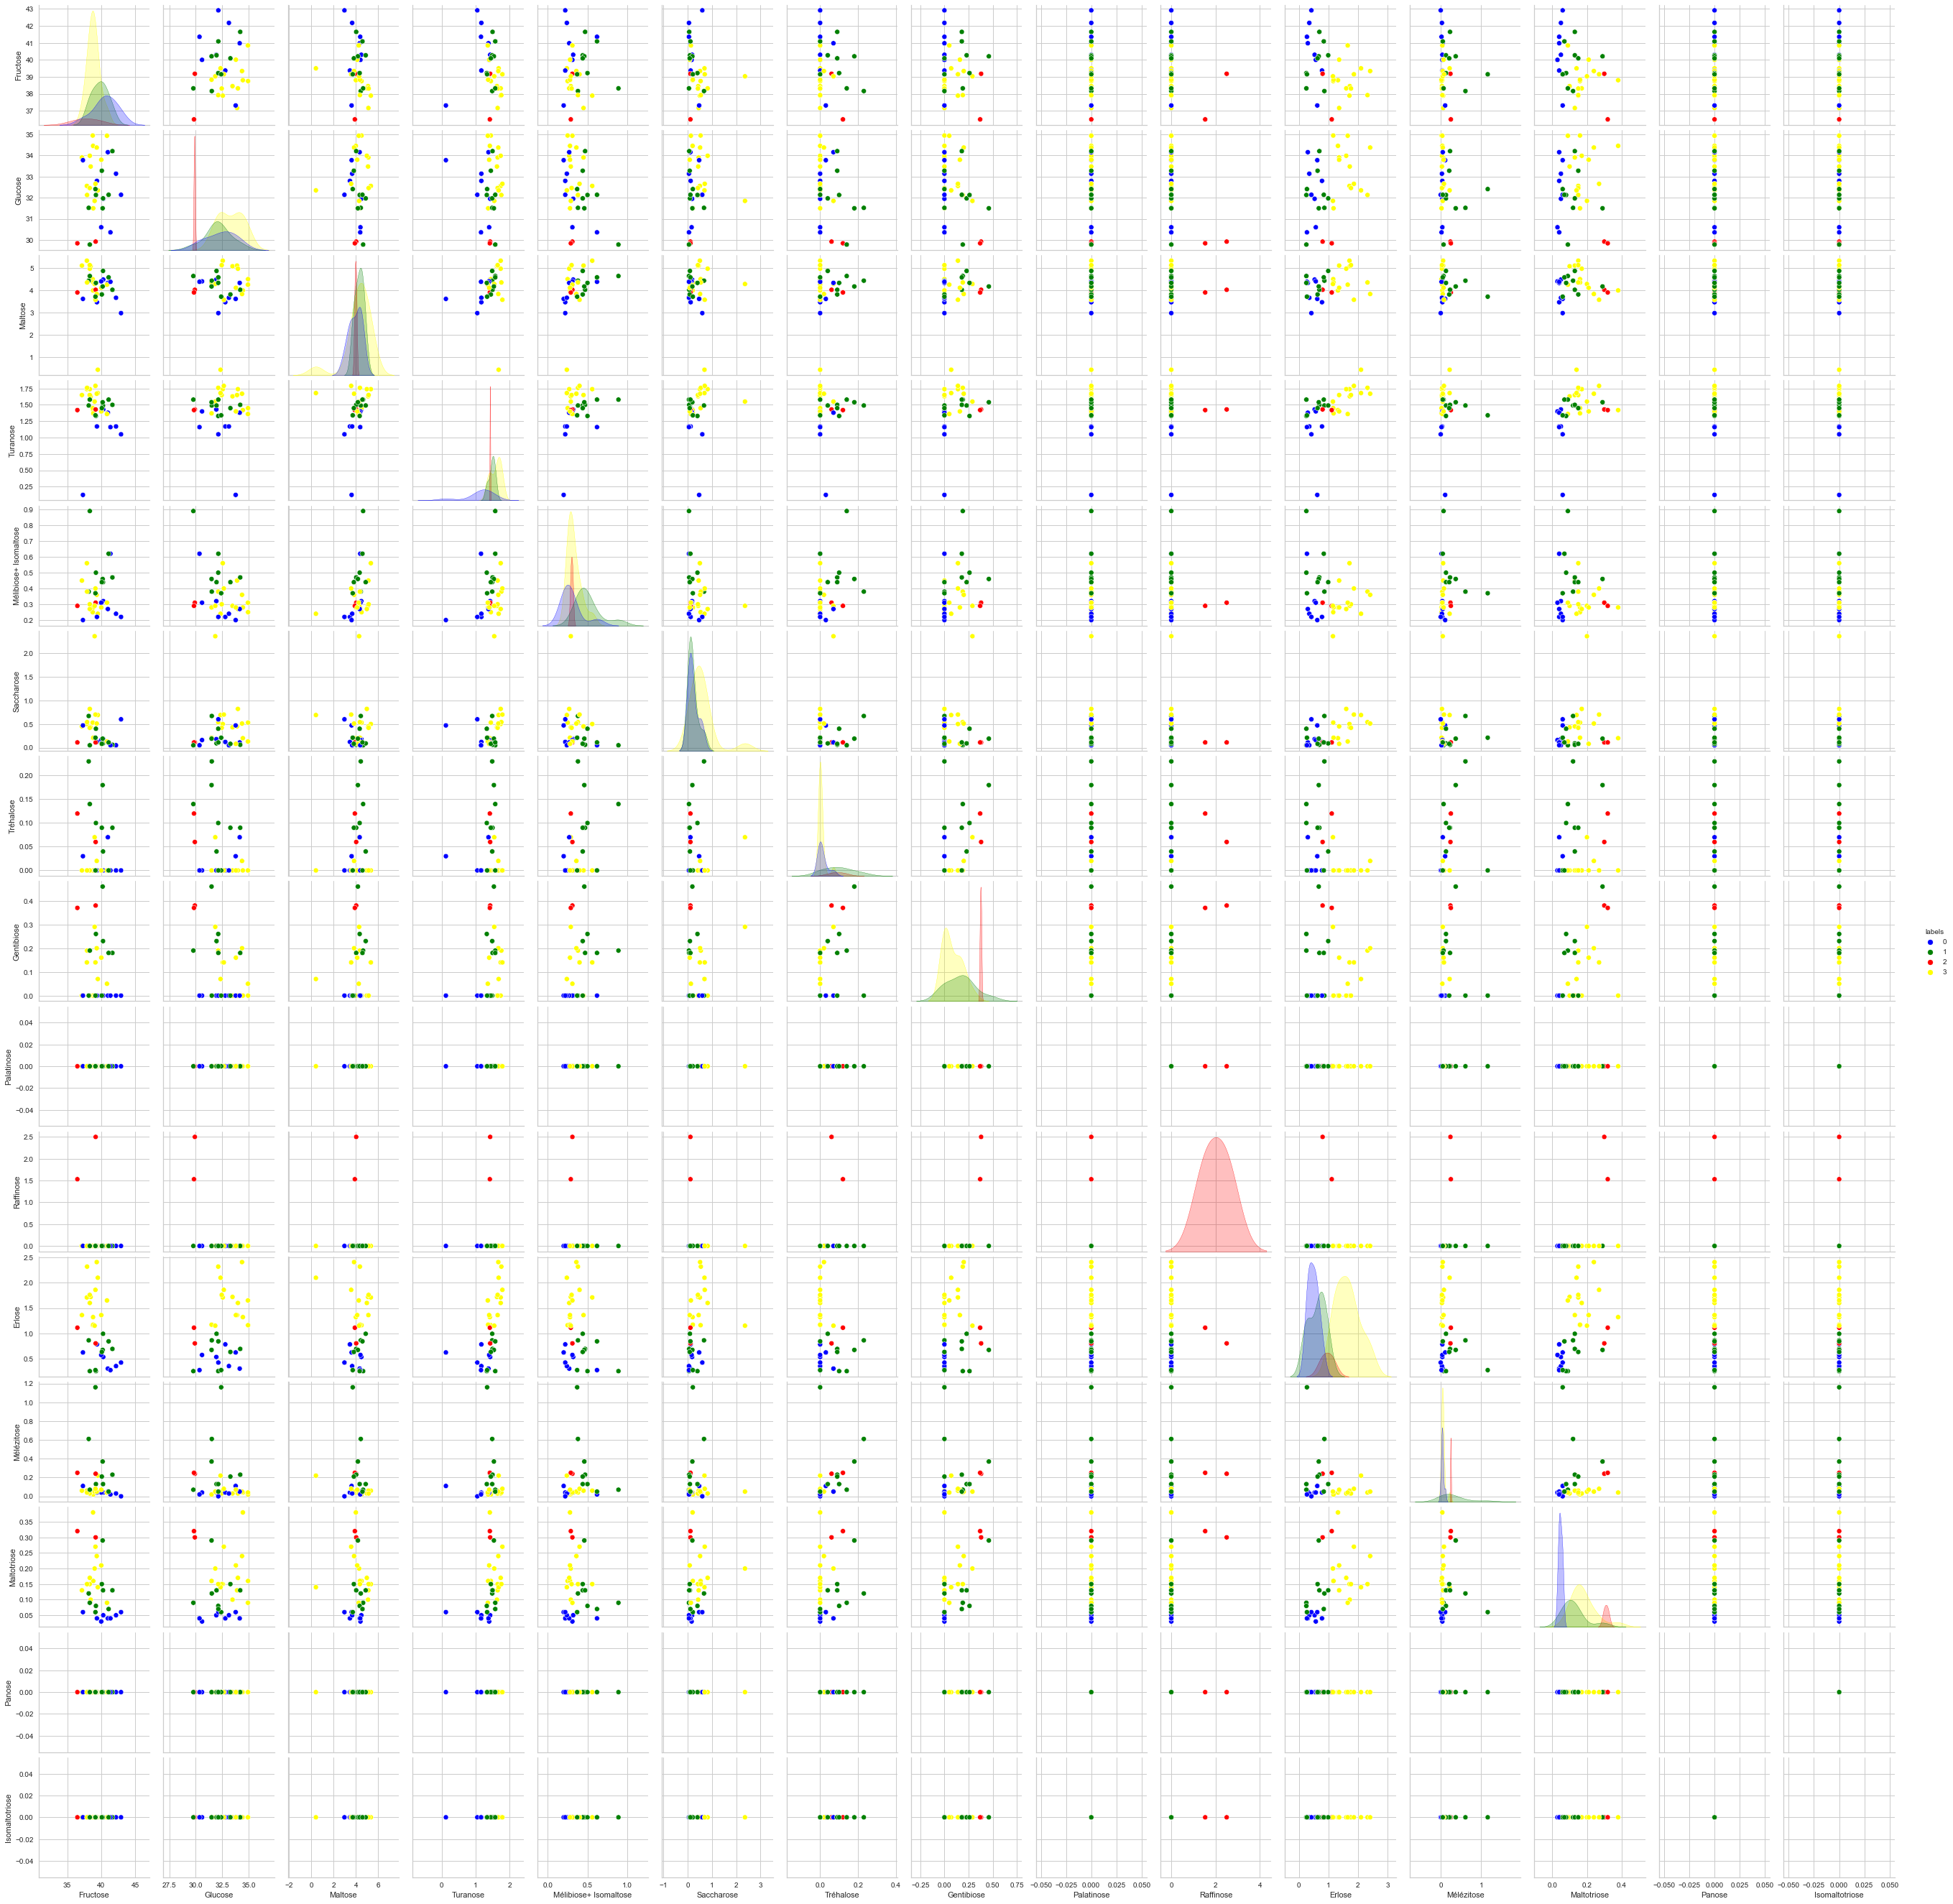

In [78]:
# rajouter la variable au dataframe initial
B = SQL_Query.copy()
B['labels'] = resBis.labels_

#configuration des points dans le plan
#des variables prise par paires
sns.pairplot(B,hue="labels",palette={0:'blue',1:'green',2:'red',3:'yellow'})

In [87]:
B

,Fructose,Glucose,Maltose,Turanose,Mélibiose+ Isomaltose,Saccharose,Tréhalose,Gentibiose,Palatinose,Raffinose,Erlose,Mélézitose,Maltotriose,Panose,Isomaltotriose,labels
0,38.45,33.48,5.09,1.630,0.29,0.43,0.00,0.00,0.0,0.00,1.72,0.03,0.10,0.0,0.0,3
1,40.30,31.95,4.49,1.430,0.32,0.18,0.00,0.00,0.0,0.00,0.53,0.04,0.05,0.0,0.0,0
2,38.80,34.46,4.00,1.420,0.28,0.20,0.00,0.00,0.0,0.00,1.32,0.04,0.38,0.0,0.0,3
3,37.89,32.56,5.34,1.740,0.56,0.50,0.00,0.14,0.0,0.00,1.71,0.06,0.15,0.0,0.0,3
4,37.16,33.91,5.12,1.650,0.45,0.45,0.00,0.00,0.0,0.00,1.36,0.06,0.13,0.0,0.0,3
5,38.75,34.95,4.51,1.450,0.25,0.53,0.00,0.00,0.0,0.00,1.16,0.02,0.16,0.0,0.0,3
6,38.83,31.50,4.36,1.370,0.28,0.21,0.00,0.00,0.0,0.00,1.17,0.02,0.16,0.0,0.0,3
7,38.32,33.99,4.98,1.740,0.27,0.82,0.00,0.00,0.0,0.00,1.60,0.03,0.17,0.0,0.0,3
8,38.31,32.46,5.14,1.650,0.30,0.42,0.00,0.00,0.0,0.00,1.76,0.03,0.15,0.0,0.0,3
9,39.50,32.35,0.43,1.680,0.24,0.69,0.00,0.07,0.0,0.00,2.10,0.22,0.14,0.0,0.0,3


In [88]:
# Exporting this data back to a New Table in SQL
from sqlalchemy import create_engine
import urllib


quoted = urllib.parse.quote_plus("Driver={SQL Server Native Client 11.0};"
                     "Server=DESKTOP-S8TORHP;"
                     "Database=dataset1;"
                     "Trusted_Connection=yes;")

engine = create_engine('mssql+pyodbc:///?odbc_connect={}'.format(quoted))

B.to_sql('dataset_clusters', schema='dbo', con = engine, if_exists = 'replace')

-1